In [6]:
import pandas as pd
import numpy as np
import re
import os

Učitavanje prosleđenih test podataka alatu.

In [34]:
databaseTest = pd.read_csv('testData.csv', sep=',', header=0)

In [159]:
databaseTest

Unnamed: 0 Gene name variation  \
0           36065      JAK1     P443L   
1           34335     SALL4     T624K   
2           26023   CACNA1D    P1878T   
3           40733       SRC     R163W   
4           15103       MET     I583M   
...           ...       ...       ...   
19175        9072      IL7R      T56S   
19176       48717      AKT1     M306I   
19177       29755     EP300    Y1467N   
19178       91143     ERCC4     E210K   
19179       70386     TRAF7       R8H   

       alpha-CH chemical shifts (Andersen et al., 1992) 1  \
0                                              -5.035675    
1                                              -0.039021    
2                                               4.089644    
3                                              -2.047004    
4                                             -23.133836    
...                                                  ...    
19175                                          -3.239612    
19176                                          -1.164472    
19177                                          -3.801046    
19178                                           0.804488    
19179                                           2.190109    

       Hydrophobicity index (Argos et al., 1982) 1  \
0                                        50.699541   
1                                       -97.280150   
2                                      -375.782911   
3                                      -116.341424   
4                                      -151.037887   
...                                            ...   
19175                                     0.000000   
19176                                   -75.638622   
19177                                   468.482624   
19178                                    -2.617184   
19179                                    -0.497960   

       Signal sequence helical potential (Argos et al., 1982) 1  \
0                                             292.841164          
1                                            -144.828282          
2                                              17.419564          
3                                             -10.021816          
4                                            -273.348775          
...                                                  ...          
19175                                          -4.497479          
19176                                         123.901608          
19177                                          27.645679          
19178                                          -3.566271          
19179                                         -12.777760          

       Membrane-buried preference parameters (Argos et al., 1982) 1  \
0                                             244.381341              
1                                            -143.221062              
2                                              30.004221              
3                                             -16.680579              
4                                            -275.191009              
...                                                  ...              
19175                                           6.017647              
19176                                         116.522281              
19177                                          89.527978              
19178                                          -4.332445              
19179                                          14.857160              

       Conformational parameter of inner helix (Beghin-Dirkx, 1975) 1  \
0                                              49.096422                
1                                              -2.138991                
2                                              29.319648                
3                                               3.872835                
4                                              -5.539023                
...                                 

In [88]:
data_files = os.listdir('odgovoriSift')

In [27]:
len(data_files)

253

Izdvajanje potrebnih podataka i formiranje baze na koju će se primeniti metrike za ocenu alata.

In [205]:
dataframe = pd.DataFrame(columns=["gene name", "variation", "class"])

In [206]:
n_doc = re.compile('Substitution at pos \d+ from \w to \w is predicted to [A-Za-z ]+ with a score of [0-9\.]+\.')
n_error = re.compile('ERROR')
br = 0
files_err = []
emptyFiles = []
errorFiles = []
for file in data_files:
    result = []
    geneName = []
    varString = []
    classArr = []
    with open("odgovoriSift/" + file, 'r') as n:
        n = n.read()
        errString = re.findall(n_error, n)
        if len(errString) != 0:
            errorFiles.append(file)
        elif n != "":
            result = re.findall(n_doc, n)
            d1 = [w.split(" from ") for w in result]
            varString = [arr[1][0] + arr[0][20:] + arr[1][5] for arr in d1]
            geneName = [file[:-7] for e in d1]
            classArr = [float(valueClass[1][-5:-1]) for valueClass in d1]
            dataframe = pd.concat([dataframe, pd.DataFrame({"gene name" : geneName, "variation" : varString, "class" : classArr})])
            for el in databaseTest[databaseTest["Gene name"] == file[:-7]]["variation"]:
                if el not in varString:
                    #print("###########")
                    #print(file)
                    #print(el)
                    br+=1
        else:
            emptyFiles.append(file)

Geni za čije za čije mutacije nije bilo dovoljno sekvenci da bi se generisao rezultat.

In [207]:
errorFiles

['FANCD2odg.txt',
 'FANCGodg.txt',
 'TSC1odg.txt',
 'PALB2odg.txt',
 'MEN1odg.txt',
 'FANCAodg.txt']

Broj nedostajućih mutacija.

In [209]:
br

817

Geni za koje nije vraćen odgovor.

In [210]:
emptyFiles

['FAT1odg.txt',
 'NOTCH1odg.txt',
 'FAT4odg.txt',
 'KMT2Dodg.txt',
 'CTCFodg.txt',
 'ZFHX3odg.txt',
 'LRP1Bodg.txt',
 'NOTCH2odg.txt',
 'ATRXodg.txt',
 'COL2A1odg.txt']

In [211]:
dataframe

gene name variation  class
0       ABL1       G6R   0.00
1       ABL1     R893G   0.00
2       ABL1      A53G   0.47
3       ABL1      A65T   0.04
4       ABL1      A75T   0.00
..       ...       ...    ...
54     RBM10     M930V   0.19
55     RBM10     E954K   0.01
56     RBM10     S962F   0.01
57     RBM10     G965V   0.00
58     RBM10     V988M   0.03

[15420 rows x 3 columns]

In [212]:
dataframe["class"] = [0.0 if e>0.05 else 1.0 for e in dataframe["class"]]

In [213]:
dataframe

gene name variation  class
0       ABL1       G6R    1.0
1       ABL1     R893G    1.0
2       ABL1      A53G    0.0
3       ABL1      A65T    1.0
4       ABL1      A75T    1.0
..       ...       ...    ...
54     RBM10     M930V    0.0
55     RBM10     E954K    1.0
56     RBM10     S962F    1.0
57     RBM10     G965V    1.0
58     RBM10     V988M    1.0

[15420 rows x 3 columns]

Nalaženje originane klase.

In [216]:
classOrig_arr = []
for index, row in dataframe.iterrows():
    class_val = databaseTest.loc[((databaseTest['Gene name'] == row['gene name'].strip()) & (databaseTest['variation'] == row['variation'].strip())), ['Class']]['Class']
    classOrig_arr.append(class_val.values[0])

In [218]:
len(classOrig_arr)

15420

In [219]:
dataframe.insert(3, "original class", classOrig_arr)

In [220]:
dataframe

gene name variation  class  original class
0       ABL1       G6R    1.0             1.0
1       ABL1     R893G    1.0             1.0
2       ABL1      A53G    0.0             1.0
3       ABL1      A65T    1.0             1.0
4       ABL1      A75T    1.0             1.0
..       ...       ...    ...             ...
54     RBM10     M930V    0.0             1.0
55     RBM10     E954K    1.0             1.0
56     RBM10     S962F    1.0             1.0
57     RBM10     G965V    1.0             1.0
58     RBM10     V988M    1.0             1.0

[15420 rows x 4 columns]

In [221]:
from sklearn import metrics

In [222]:
metrics.accuracy_score(dataframe['original class'], dataframe['class'])

0.6390402075226977

In [226]:
metrics.balanced_accuracy_score(dataframe['original class'], dataframe['class'])

0.576535626411542

In [223]:
metrics.precision_score(dataframe['original class'], dataframe['class'])

0.9734863876472979

In [224]:
metrics.recall_score(dataframe['original class'], dataframe['class'])

0.6436727565824826

In [225]:
metrics.f1_score(dataframe['original class'], dataframe['class'])

0.7749474365194889

In [227]:
metrics.roc_auc_score(dataframe['original class'], dataframe['class'])

0.576535626411542

In [228]:
metrics.confusion_matrix(dataframe['original class'], dataframe['class'])

array([[ 271,  261],
       [5305, 9583]])

In [229]:
import matplotlib.pyplot as plt  
import seaborn as sns

[Text(0, 0.5, 'neutral'), Text(0, 1.5, 'cancer')]

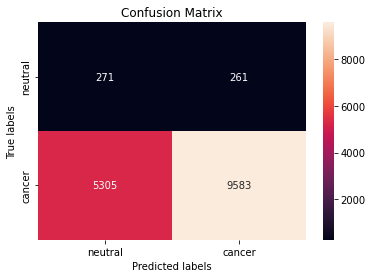

In [230]:
ax = plt.subplot()
sns.heatmap(metrics.confusion_matrix(dataframe['original class'], dataframe['class']), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['neutral', 'cancer'])
ax.yaxis.set_ticklabels(['neutral', 'cancer'])

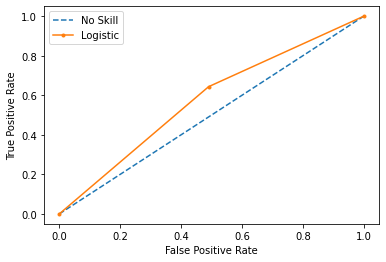

In [231]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = metrics.roc_curve(dataframe['original class'], dataframe['class'])
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Izdvajanje mutacija koje se pogrešno klasifikuju.

In [238]:
dataframe[dataframe['class'] != dataframe['original class']]["gene name"].value_counts()[0:20]

TRRAP     113
APC       100
PTPRT      99
MTOR       91
MED12      88
BRCA2      87
ERBB4      87
POLE       84
PTPRB      77
DICER1     76
CARD11     74
ATM        74
GRIN2A     71
EGFR       70
ATR        66
PIK3CA     64
KDR        63
PDGFRA     63
TET2       58
PTCH1      53
Name: gene name, dtype: int64

In [239]:
databaseTest['Gene name'].value_counts()[0:20]

LRP1B     477
KMT2D     397
FAT4      373
NOTCH1    301
FAT1      279
APC       266
ATM       251
ZFHX3     241
BRCA2     207
ERBB4     202
PTPRT     202
GRIN2A    195
CREBBP    194
SPEN      193
NF1       188
ARID1A    186
MTOR      180
ATRX      177
EP300     177
MED12     174
Name: Gene name, dtype: int64

Alat ne gresi za gen LRP1B i ako ga ima najviše u test skupu. Uglavnom greši za one gene za koje ima mali broj različitih sekvenci.

In [241]:
dataframe[(dataframe['class'] != dataframe['original class']) & (dataframe["gene name"] == "LRP1B")]

Empty DataFrame
Columns: [gene name, variation, class, original class]
Index: []